In [16]:
import pandas as pd 
from  prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet 

In [4]:
df = pd.read_csv('final_time_series_data.csv')
df.head()

,Unnamed: 0,Date,values,prod
0,0,2021-01-01 00:00:00,2.301128,prod1
1,1,2021-01-01 00:01:00,1.100027,prod1
2,2,2021-01-01 00:02:00,0.746019,prod1
3,3,2021-01-01 00:03:00,0.995015,prod1
4,4,2021-01-01 00:04:00,2.408273,prod1


In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3795840 entries, 0 to 3795839
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Date        object 
 2   values      float64
 3   prod        object 
dtypes: float64(1), int64(1), object(2)
memory usage: 115.8+ MB


In [6]:
df = df[["Date","values"]]
df.columns= ['ds','y']
df.head()

,ds,y
0,2021-01-01 00:00:00,2.301128
1,2021-01-01 00:01:00,1.100027
2,2021-01-01 00:02:00,0.746019
3,2021-01-01 00:03:00,0.995015
4,2021-01-01 00:04:00,2.408273


In [7]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

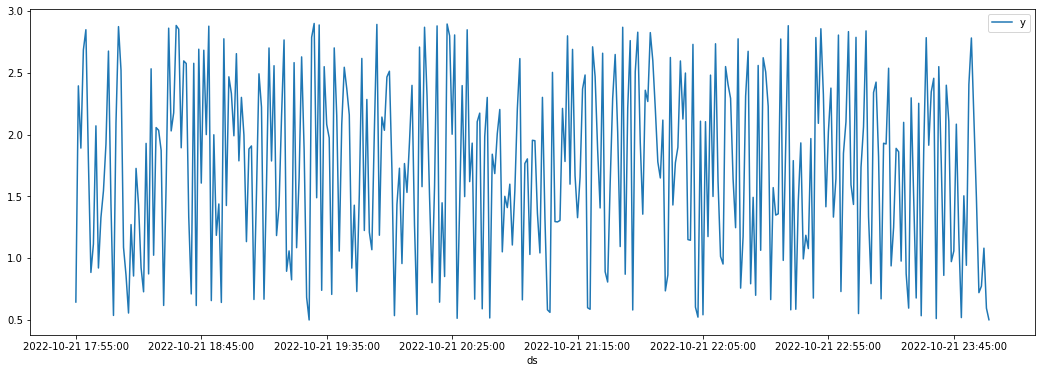

In [8]:
test.plot(x='ds', y='y', figsize=(18,6))

In [9]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=180)
foreacst = m.predict(future)

18:46:29 - cmdstanpy - INFO - Chain [1] start processing
19:20:49 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
foreacst.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
949135,2023-04-15 23:59:00,1.698317,0.817313,2.614215,1.678808,1.717032,0.000126,0.000126,0.000126,-0.000092,-0.000092,-0.000092,0.000217,0.000217,0.000217,0.0,0.0,0.0,1.698443
949136,2023-04-16 23:59:00,1.698313,0.853056,2.585600,1.678723,1.717154,-0.000009,-0.000009,-0.000009,-0.000092,-0.000092,-0.000092,0.000083,0.000083,0.000083,0.0,0.0,0.0,1.698304
949137,2023-04-17 23:59:00,1.698309,0.800024,2.580132,1.678580,1.717340,-0.001359,-0.001359,-0.001359,-0.000092,-0.000092,-0.000092,-0.001267,-0.001267,-0.001267,0.0,0.0,0.0,1.696949
949138,2023-04-18 23:59:00,1.698304,0.826490,2.573991,1.678299,1.717615,0.000018,0.000018,0.000018,-0.000092,-0.000092,-0.000092,0.000110,0.000110,0.000110,0.0,0.0,0.0,1.698323
949139,2023-04-19 23:59:00,1.698300,0.817093,2.655148,1.678027,1.717720,0.000126,0.000126,0.000126,-0.000092,-0.000092,-0.000092,0.000217,0.000217,0.000217,0.0,0.0,0.0,1.698426


In [11]:
foreacst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
949135,2023-04-15 23:59:00,1.698443,0.817313,2.614215
949136,2023-04-16 23:59:00,1.698304,0.853056,2.585600
949137,2023-04-17 23:59:00,1.696949,0.800024,2.580132
949138,2023-04-18 23:59:00,1.698323,0.826490,2.573991
949139,2023-04-19 23:59:00,1.698426,0.817093,2.655148


In [17]:
import plotly.graph_objs as go

ModuleNotFoundError: No module named 'plotly'

In [18]:
plot_plotly(m, foreacst)

NameError: name 'go' is not defined

In [19]:
plot_components_plotly(m, foreacst)

NameError: name 'go' is not defined

In [21]:
from statsmodels.tools.eval_measures import rmse

In [22]:
predictions = foreacst.iloc[-365:]['yhat']

In [23]:
print("RMSE b/w actual and predicted values:", rmse(predictions, test['y']))
print("Mean value of test dataset:", test['y'].mean())

RMSE b/w actual and predicted values: 0.72525881507003
Mean value of test dataset: 1.7338803618352445


In [24]:
from prophet.serialize import model_to_json, model_from_json

In [25]:
with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model